In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
data_train = pd.read_csv('emnist-balanced-train.csv')
data_test = pd.read_csv('emnist-balanced-test.csv')

In [30]:
print(data_train.shape)
print(data_test.shape)

(112799, 785)
(18799, 785)


In [31]:
data_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_train.info

<bound method DataFrame.info of         45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  \
0       36  0    0    0    0    0    0    0    0    0  ...      0      0   
1       43  0    0    0    0    0    0    0    0    0  ...      0      0   
2       15  0    0    0    0    0    0    0    0    0  ...      0      0   
3        4  0    0    0    0    0    0    0    0    0  ...      0      0   
4       42  0    0    0    0    0    0    0    0    0  ...      0      0   
...     .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
112794  22  0    0    0    0    0    0    0    0    0  ...      0      0   
112795  17  0    0    0    0    0    0    0    0    0  ...      0      0   
112796  23  0    0    0    0    0    0    0    0    0  ...      0      0   
112797  31  0    0    0    0    0    0    0    0    0  ...      0      0   
112798   8  0    0    0    0    0    0    0    0    0  ...      0      0   

        0.526  0.527  0.528  0.529  0.530  0.531  0.532

In [33]:
nan = data_train.isnull().sum()
nan[nan!=0]

Series([], dtype: int64)

In [34]:
data_train.describe()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
count,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,...,112799.000000,112799.0,112799.0,112799.000000,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.0
mean,22.999805,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020701,0.017438,0.018475,...,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.564622,0.0,0.0,0.0,0.0,0.235048,1.221831,1.658805,1.602485,1.719556,...,0.104211,0.0,0.0,0.726503,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,23.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,35.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,192.000000,217.000000,217.000000,217.000000,...,35.000000,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

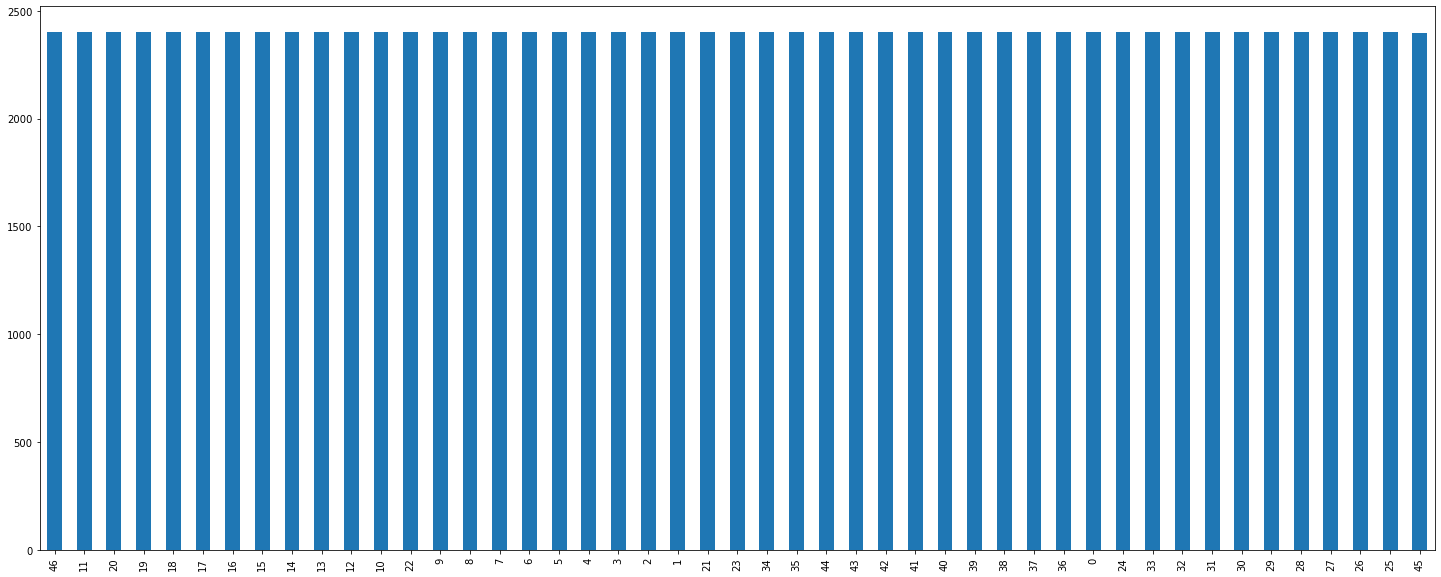

In [35]:
data_train['45'].value_counts().plot(kind='bar',figsize=(25,10))

In [36]:

y_train = data_train.iloc[:,0]
X_train = data_train.iloc[:,1:]

y_test = data_test.iloc[:,0]
X_test = data_test.iloc[:,1:]

In [37]:
print(X_train.shape)
print(y_train.shape)

(112799, 784)
(112799,)


In [38]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

## Some Visualizations

In [39]:
label_map = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

In [40]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [41]:
sample_image = X_train.iloc[10]
sample_label = y_train.iloc[10] 

Character in 10 is: n


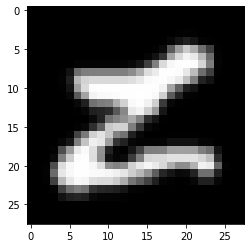

In [42]:
print("Character in 10 is:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [43]:
def rotateAndFlip(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

X_train = np.apply_along_axis(rotateAndFlip, 1, X_train.values) 

In [44]:
print(X_train.shape)
print(type(X_train))

(112799, 28, 28)
<class 'numpy.ndarray'>


Label entry 10: n


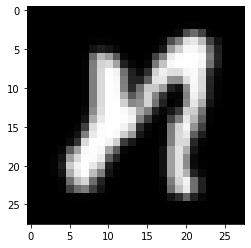

In [45]:
sample_image = X_train[10]
sample_label = y_train.iloc[10]

print("Label entry 10:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

## Normalize Data

In [48]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test / 255.0


X_test
#trainImages = trainImages.reshape(y_train.shape[0], 28, 28, 1)
#testImages = testImages.reshape(X_test.shape[0], 28, 28, 1)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=43)

## Building CNN Model

In [3]:
import tensorflow as tf,keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(350 , activation="relu"))
model.add(keras.layers.Dense(150 , activation="relu"))
model.add(keras.layers.Dense(47 , activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
history=model.fit(X_train, y_train,epochs=30,validation_data=(X_val, y_val))

NameError: name 'X_train' is not defined